In [1]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and plot data

In [2]:
df = pd.read_csv("data/data-ss2.txt")
print(len(df))
df.head(5)

44


,X,Y
0,1,18.073
1,2,23.665
2,3,16.410
3,4,14.931
4,5,17.106


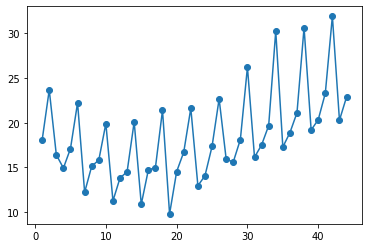

In [3]:
plt.plot(df["X"], df["Y"], "o-")

# Run Stan

In [4]:
#model = CmdStanModel(stan_file="model/model12-6.stan")
model = CmdStanModel(stan_file="model/model12-6b.stan")
print(model)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chapter12/model/model12-6b
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chapter12/model/model12-6b


CmdStanModel: name=model12-6b
	 stan_file=/workdir/chapter12/model/model12-6b.stan
	 exe_file=/workdir/chapter12/model/model12-6b
	 compiler_optons=stanc_options=None, cpp_options=None


In [5]:
data = {
    "T": len(df),
    "Y": df["Y"].values
}

In [16]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


In [17]:
# 収束しないこともある
summary = fit.summary()
summary[summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


# Plot the result

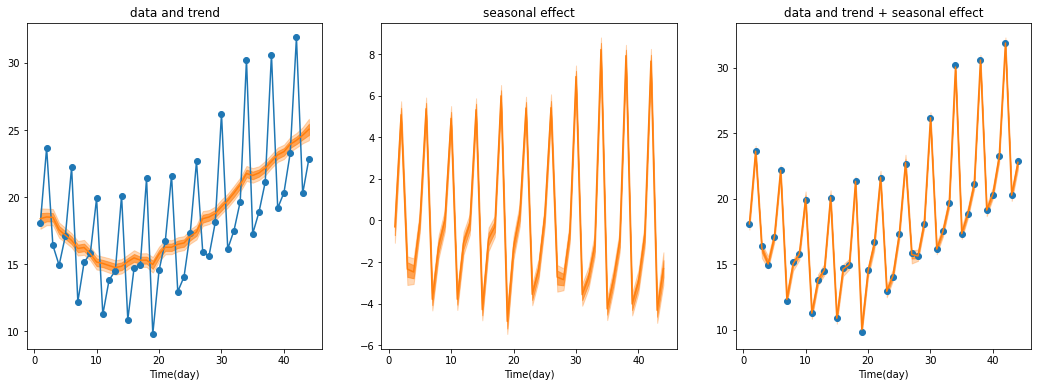

In [18]:
mu_percentiles = np.percentile(fit.stan_variable("mu"), [10.0, 25.0, 50.0, 75.0, 90.0] , axis=0)
season_percentiles = np.percentile(fit.stan_variable("season"), [10.0, 25.0, 50.0, 75.0, 90.0] , axis=0)
y_mean_percentiles = np.percentile(fit.stan_variable("y_mean"), [10.0, 25.0, 50.0, 75.0, 90.0] , axis=0)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


def plot_pred(ax, df, percentiles):
    ax.fill_between(df["X"].values, percentiles[0], percentiles[4], alpha=0.3, color="C1")
    ax.fill_between(df["X"].values, percentiles[1], percentiles[3], alpha=0.6, color="C1")
    ax.plot(df["X"].values, percentiles[2], color="C1")
    ax.set_xlabel("Time(day)")

axes[0].plot(df["X"].values, df["Y"].values, 'o-', color="C0")
plot_pred(ax=axes[0], df=df, percentiles=mu_percentiles)
axes[0].set_title("data and trend")

plot_pred(ax=axes[1], df=df, percentiles=season_percentiles)
axes[1].set_title("seasonal effect")

axes[2].plot(df["X"].values, df["Y"].values, 'o', color="C0")
plot_pred(ax=axes[2], df=df, percentiles=y_mean_percentiles)
axes[2].set_title("data and trend + seasonal effect")

fig.show()